###Loading H2O Library


In [0]:
!pip install h2o
import h2o

 Get H2O Version

In [0]:
h2o.__version__

u'3.28.0.3'

###Initalizing H2O cluster

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 mins 08 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_unknownUser_vb1fi1
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


Importing both training and test dataset into H2O cluster memory

In [0]:
df = h2o.import_file("train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


Understanding the dataset

In [0]:
df.describe()

Rows:10000
Cols:12




,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
type,int,int,real,int,real,real,real,real,int,real,int,int
mins,5.0,0.0,0.0,1.0,1.0,6.0,0.0,290.44,0.0,739200.0,1.0,2.0
mean,8.3178,0.5241,0.270548,2.5023,15.7543,46.5346,0.486638986784,350.885758,0.8913,917487.413333,2.6166,6266.5542
maxs,16.0,2.0,1.0,16.0,72.0,289.0,1.0,425.06,2.0,1311200.0,5.0,12500.0
sigma,1.74880215888,0.50024415481,0.196433648629,1.31178000697,10.3889063162,34.012648954,0.134551819169,16.2857440478,0.329082268611,92717.640162,0.802788195534,3610.17028784
zeros,0,4763,898,0,0,0,7,0,1144,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812041116,324.36,1.0,862400.0,3.0,7570.0
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236417034,359.34,0.0,959200.0,4.0,12128.0
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232011747,332.84,1.0,836000.0,3.0,2181.0


Listing all columns

In [0]:
df.col_names

[u'Allied_Nations',
 u'Diplomatic_Meetings_Set',
 u'Percent_Of_Forces_Mobilized',
 u'Hostile_Nations',
 u'Active_Threats',
 u'Inactive_Threats',
 u'Citizen_Fear_Index',
 u'Closest_Threat_Distance(km)',
 u'Aircraft_Carriers_Responding',
 u'Troops_Mobilized(thousands)',
 u'DEFCON_Level',
 u'ID']

Setting response variable

In [0]:
response = "DEFCON_Level"

Setting response variable to enum or categorical so we can build a classification model

In [0]:
df[response] = df[response].asfactor()

Spliting the dataset into train and test 

In [0]:
train_df, test_df = df.split_frame(ratios=[0.9])

In [0]:
print(train_df.shape)
print(test_df.shape)

(8965, 12)
(1035, 12)


Understanding Training dataset

In [0]:
train_df.describe()

Rows:8965
Cols:12




,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
type,int,int,real,int,real,real,real,real,int,real,enum,int
mins,5.0,0.0,0.0,1.0,1.0,6.0,0.0,290.44,0.0,739200.0,,2.0
mean,8.31622978249,0.521807027328,0.270619074177,2.50429447853,15.7611266035,46.6294478528,0.486196278069,350.943121026,0.892470719465,917601.635992,,6263.16597881
maxs,16.0,2.0,1.0,16.0,72.0,289.0,1.0,425.06,2.0,1311200.0,,12499.0
sigma,1.75351017143,0.500444550942,0.196194798464,1.30854998516,10.3681867981,34.1565377055,0.135063811769,16.3244209117,0.327312044086,93172.0946203,,3604.15693308
zeros,0,4291,802,0,0,0,7,0,1014,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812041116,324.36,1.0,862400.0,3,7570.0
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236417034,359.34,0.0,959200.0,4,12128.0
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232011747,332.84,1.0,836000.0,3,2181.0


In [0]:
###: Understanding Test dataset

In [0]:
test_df.describe()

Rows:1035
Cols:12




,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
type,int,int,real,int,real,real,real,real,int,real,enum,int
mins,5.0,0.0,0.0,1.0,1.0,7.0,0.0418502202643,303.16,0.0,739200.0,,11.0
mean,8.33140096618,0.543961352657,0.26993236715,2.48502415459,15.6951690821,45.7130434783,0.490473656955,350.388888889,0.88115942029,916498.035427,,6295.90241546
maxs,16.0,1.0,0.79,15.0,72.0,278.0,0.964023494861,425.06,2.0,1232000.0,,12500.0
sigma,1.70824869559,0.498304434976,0.198585167931,1.3399521753,10.5715795345,32.7443245029,0.130032955786,15.9459133642,0.344032589061,88721.0098455,,3663.4771028
zeros,0,472,96,0,0,0,0,0,130,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,1.0,0.08,2.0,42.0,52.0,0.357562408223,349.8,1.0,1038400.0,4,4717.0
1,6.0,0.0,0.0,2.0,27.0,60.0,0.428046989721,365.7,1.0,968000.0,3,2451.0
2,8.0,0.0,0.48,3.0,39.0,106.0,0.523494860499,349.8,1.0,800800.0,1,11278.0


In [0]:
###: Training and test dataset - columns and rows details

In [0]:
print(train_df.shape)
print(test_df.shape)

(8965, 12)
(1035, 12)


In [0]:
###: Training and Test Dataframes - columns names

In [0]:
print(train_df.col_names)
print(test_df.col_names)

[u'Allied_Nations', u'Diplomatic_Meetings_Set', u'Percent_Of_Forces_Mobilized', u'Hostile_Nations', u'Active_Threats', u'Inactive_Threats', u'Citizen_Fear_Index', u'Closest_Threat_Distance(km)', u'Aircraft_Carriers_Responding', u'Troops_Mobilized(thousands)', u'DEFCON_Level', u'ID']
[u'Allied_Nations', u'Diplomatic_Meetings_Set', u'Percent_Of_Forces_Mobilized', u'Hostile_Nations', u'Active_Threats', u'Inactive_Threats', u'Citizen_Fear_Index', u'Closest_Threat_Distance(km)', u'Aircraft_Carriers_Responding', u'Troops_Mobilized(thousands)', u'DEFCON_Level', u'ID']


In [0]:
###: Settings all features for supervised machine learning

In [0]:
features = train_df.col_names
print(features)

[u'Allied_Nations', u'Diplomatic_Meetings_Set', u'Percent_Of_Forces_Mobilized', u'Hostile_Nations', u'Active_Threats', u'Inactive_Threats', u'Citizen_Fear_Index', u'Closest_Threat_Distance(km)', u'Aircraft_Carriers_Responding', u'Troops_Mobilized(thousands)', u'DEFCON_Level', u'ID']


In [0]:
###: Creating a list of all features we will use for machine learning

In [0]:
features.remove(response)
print(features)

[u'Allied_Nations', u'Diplomatic_Meetings_Set', u'Percent_Of_Forces_Mobilized', u'Hostile_Nations', u'Active_Threats', u'Inactive_Threats', u'Citizen_Fear_Index', u'Closest_Threat_Distance(km)', u'Aircraft_Carriers_Responding', u'Troops_Mobilized(thousands)']


In [0]:
###: Ignoring other features which are not needed for training

In [0]:
for feature_name in ['ID', '....', '....']:
    features.remove(feature_name)
print(features)    

In [0]:
###: Understanding response variable values as historgram in Training data

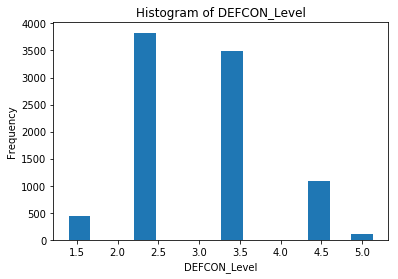

In [0]:
train_df[response].asnumeric().hist()

In [0]:
###: Importing H2O H2OGradientBoostingEstimator to build GBM Model

In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [0]:
###:Building Gradient Boosting (GBM) -  Classification model with cross validation

In [0]:
gbm_model_with_cv = H2OGradientBoostingEstimator(nfolds=5)

In [0]:
###: Training the model

In [0]:
gbm_model_with_cv.train(x = features, y = response, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,Error,Rate
0,132.0,233.0,82.0,3.0,0.0,0.706667,318 / 450
1,35.0,3060.0,718.0,13.0,0.0,0.200209,"766 / 3,826"
2,6.0,964.0,2395.0,130.0,0.0,0.314735,"1,100 / 3,495"
3,4.0,76.0,445.0,565.0,2.0,0.482601,"527 / 1,092"
4,0.0,8.0,25.0,33.0,36.0,0.647059,66 / 102
5,177.0,4341.0,3665.0,744.0,38.0,0.309760,"2,777 / 8,965"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.690240
1,2,0.929392
2,3,0.992638
3,4,0.999219
4,5,1.000000


In [0]:
###: Getting model performance

In [0]:
#gbm_model_with_cv.model_performance(valid=True,test_data=test_df).auc()
import json
json_string = json.dumps(str(gbm_model_with_cv.model_performance(valid=True,test_data=test_df)._metric_json),ensure_ascii=False)
python_dictionary = json.loads(json_string)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,Error,Rate
0,7.0,36.0,5.0,0.0,0.0,0.854167,41 / 48
1,6.0,334.0,101.0,3.0,0.0,0.247748,110 / 444
2,2.0,123.0,265.0,25.0,0.0,0.361446,150 / 415
3,2.0,9.0,70.0,39.0,0.0,0.675000,81 / 120
4,0.0,1.0,2.0,5.0,0.0,1.000000,8 / 8
5,17.0,503.0,443.0,72.0,0.0,0.376812,"390 / 1,035"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.623188
1,2,0.905314
2,3,0.979710
3,4,0.997101
4,5,1.000000


In [0]:
###:Building GBM classification model with cross validation and key GBM parameters configuration

In [0]:
gbm_model_cv_config = H2OGradientBoostingEstimator(nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345)

In [0]:
###: Training GBM Model

In [0]:
gbm_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "gbm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
###: Getting GBM model performance on test data

In [0]:
#gbm_model_cv_config.model_performance(valid=True,test_data=test_df).auc()
json_string = json.dumps(str(gbm_model_cv_config.model_performance(valid=True,test_data=test_df)._metric_json),ensure_ascii=False)
python_dictionary = json.loads(json_string)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,Error,Rate
0,7.0,36.0,5.0,0.0,0.0,0.854167,41 / 48
1,6.0,334.0,101.0,3.0,0.0,0.247748,110 / 444
2,2.0,123.0,265.0,25.0,0.0,0.361446,150 / 415
3,2.0,9.0,70.0,39.0,0.0,0.675000,81 / 120
4,0.0,1.0,2.0,5.0,0.0,1.000000,8 / 8
5,17.0,503.0,443.0,72.0,0.0,0.376812,"390 / 1,035"



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.623188
1,2,0.905314
2,3,0.979710
3,4,0.997101
4,5,1.000000


In [0]:
###: Importing H2O Grid Library

In [0]:
from h2o.grid import H2OGridSearch

In [0]:
###: Settings GBM grid parameters

In [0]:
gbm_hyper_params = {"learn_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
                "max_depth": [ 5, 7, 10],
                "sample_rate": [0.5, 0.75, 1.0],
                "col_sample_rate": [0.5, 0.6, 0.7, 0.8]}

In [0]:
###: Setting H2O Grid Search Criteria

In [0]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 123,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [0]:
###: Finalzing the H2O Grid searching settings

In [0]:
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(
                                                    nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345),
                     hyper_params=gbm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="titnaic_gbm_grid_python")

In [0]:
###: Finally training H2O Grid with data 

In [0]:
gbm_grid.train(x=features, y=response, training_frame=train_df)

gbm Grid Build progress: |███████████████████████████████████████████████

In [0]:
###: Finally getting total count of GBM models

In [0]:
len(gbm_grid)

In [0]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [0]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [0]:
###: Applying the function to get the best model from the grid

In [0]:
best_model = find_best_model_from_grid(gbm_grid, "auc")

In [0]:
###: Getting the best model performance on test data

In [0]:
best_model.model_performance(valid=True,test_data=test_df).auc()

In [0]:
###: Performing predictions with one of the above model

In [0]:
gbm_predictions = best_model.predict(test_df)

In [0]:
gbm_predictions

In [0]:
###: Understanding/Validating predictions based on prediction results historgram

In [0]:
gbm_predictions['predict'].asnumeric().hist()

In [0]:
###: Getting Scorring History

In [0]:
best_model.scoring_history()

In [0]:
###: Getting GBM model variable importance 

In [0]:
best_model.varimp()

In [0]:
###: Getting model variable importance PLOT

In [0]:
best_model.varimp_plot()